<a href="https://colab.research.google.com/github/narc01eptic/vmsk-2021/blob/main/vmsk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install neurokit2
!pip install wfdb
!pip install pyhrv
!pip install gdown

In [3]:
!mkdir /content/ecg
!gdown -O /content/ecg/PX113190416115700_full_ch_1.txt https://drive.google.com/uc?id=17-TYDv3xGtL_0LXe_jjWjKFXqyaGfs6Q
!gdown -O /content/ecg/PX113190529165727_full_ch_1.txt https://drive.google.com/uc?id=1vnYBjDMyuj-MH2MUTMpmc55-g3--_51n
!gdown -O /content/ecg/PX458190315162821_full_ch_1.txt https://drive.google.com/uc?id=1WMprHbxzROm4ez9HiNnKRuyqcGTE3kDT

mkdir: cannot create directory ‘/content/ecg’: File exists
Downloading...
From: https://drive.google.com/uc?id=17-TYDv3xGtL_0LXe_jjWjKFXqyaGfs6Q
To: /content/ecg/PX113190416115700_full_ch_1.txt
1.25GB [00:05, 249MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vnYBjDMyuj-MH2MUTMpmc55-g3--_51n
To: /content/ecg/PX113190529165727_full_ch_1.txt
220MB [00:01, 183MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WMprHbxzROm4ez9HiNnKRuyqcGTE3kDT
To: /content/ecg/PX458190315162821_full_ch_1.txt
936MB [00:14, 63.1MB/s]


In [4]:
import neurokit2 as nk
import pyhrv.frequency_domain as fd
import wfdb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images

In [5]:
ecg_PX113190416115700 = "/content/ecg/PX113190416115700_full_ch_1.txt"
ecg_PX113190529165727 = "/content/ecg/PX113190529165727_full_ch_1.txt"
ecg_PX458190315162821 = "/content/ecg/PX458190315162821_full_ch_1.txt"

signal length:  5095562500


Text(0.5, 1.0, 'ECG')

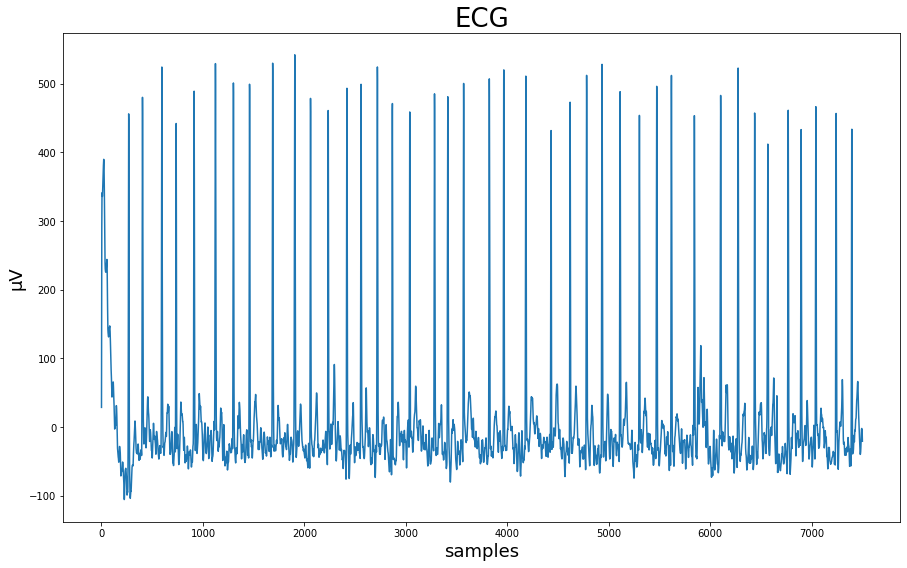

In [6]:
fs = 250
sec = 30
w = int(fs*sec)
ecg_part = []
part = 0
with open(ecg_PX113190529165727) as f:
    ecg = [float(line.strip()) for line in f.readlines()]

ecg_part = ecg[part * w:part * w + w]
# ecg_part = signal[0:int(fs*sec),0]
print("signal length: ", len(ecg) * fs)
ecg_clean = nk.ecg_clean(ecg_part, sampling_rate=fs, method="neurokit")
# plt.ylabel(fields['units'][0], fontsize=18)
plt.ylabel("μV", fontsize=18)
plt.xlabel("samples", fontsize=18)
plt.plot(ecg_clean, color="#1f77b4")
plt.title("ECG",fontsize=26)

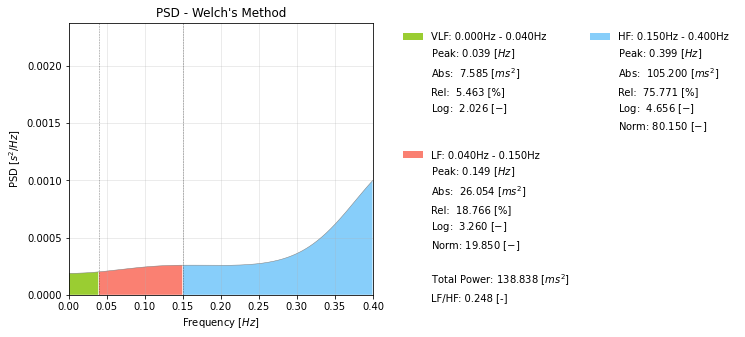

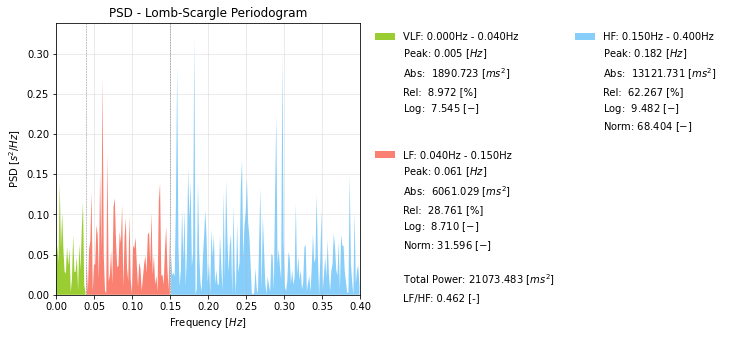

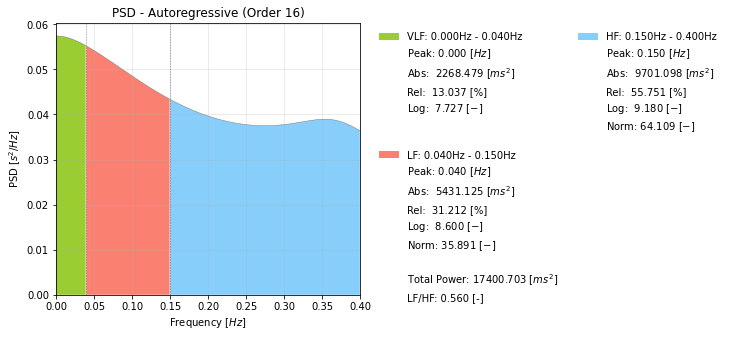

In [7]:
results = fd.frequency_domain(signal=ecg_part, sampling_rate=fs)

In [ ]:
# signals, info = nk.ecg_process(ecg_clean, sampling_rate=fs);
# signals
# peaks = signals["ECG_R_Peaks"]

In [ ]:
peaks, info = nk.ecg_peaks(ecg_clean, sampling_rate=fs, correct_artifacts=True)

,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI
0,101.787699,541.29399,105.975226,101.792289,0.195781,0.188045,536.0,94.8864,0.177027,132.0,58.987547,79.408049,1048.0,19.614159


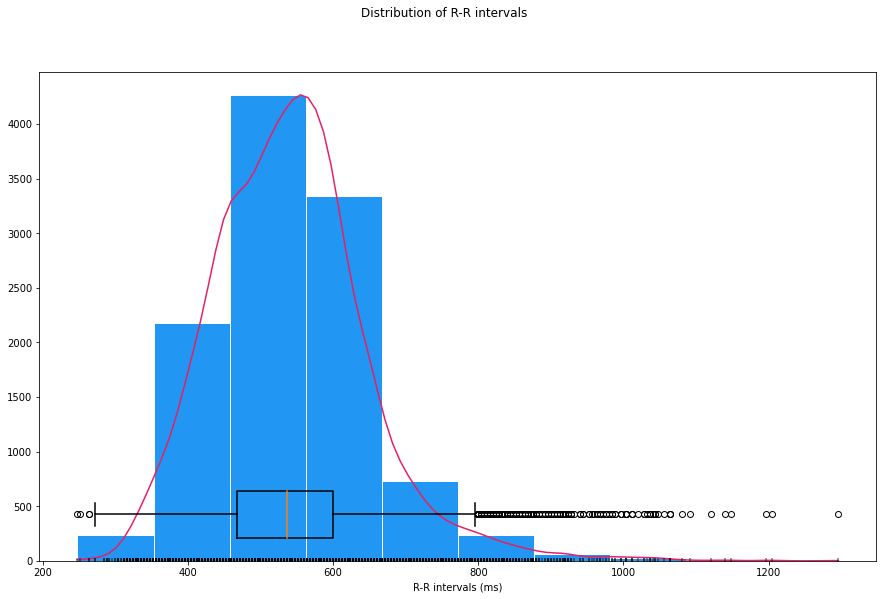

In [ ]:
hrv_time = nk.hrv_time(peaks, sampling_rate=fs, show=True)
hrv_time

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,0.00061,0.000694,0.000692,0.001191,0.000365,0.580572,0.194763,0.335468,-6.732728


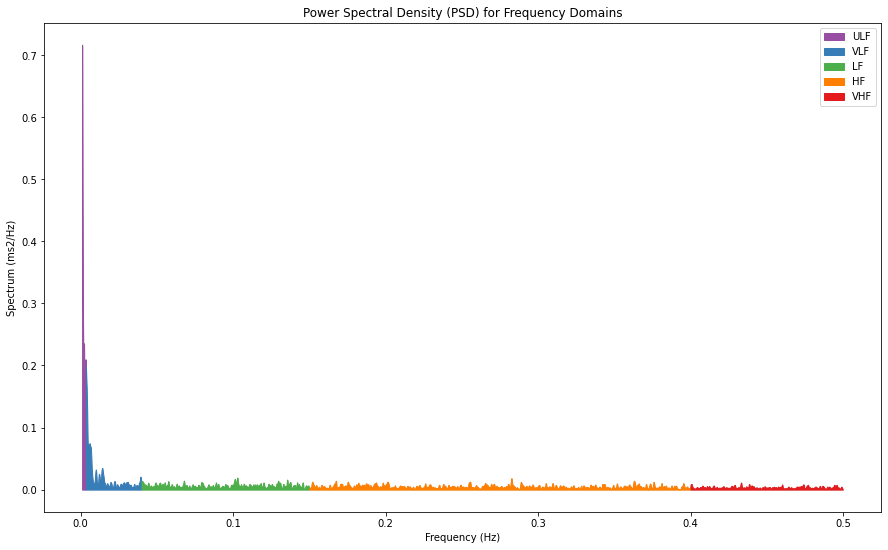

In [ ]:
hrv_freq = nk.hrv_frequency(peaks, sampling_rate=fs, show=True)
hrv_freq

,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
0,99.427184,149.361498,0.665681,46654.51458,1.50222,5.375864,897.495277,0.655882,0.645309,0.892435,0.224432,49.968051,49.922624,50.01132,50.038139,0.508422,0.491578,70.895305,69.710996,0.507798,0.492202,106.434905,104.787729,0.50799,0.49201,90.428241,88.994638,1.667327,1.878785


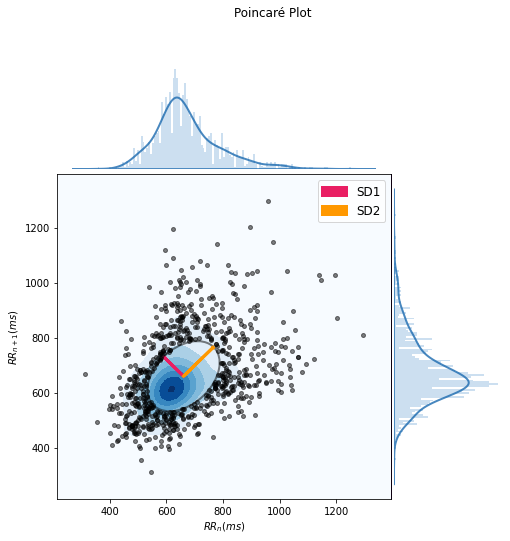

In [ ]:
hrv_non = nk.hrv_nonlinear(peaks, sampling_rate=fs, show=True)
hrv_non

In [ ]:
sec = 120
window_size = int(fs*sec)
LF, ecg_w = [], [[]]
w = 0
for p in ecg_clean:
  if w == window_size:
    ecg_w.append([p])
    w = 0
  else:
    ecg_w[-1].append(p)
  w += 1

In [ ]:
for w in ecg_w:
  peaks, info = nk.ecg_peaks(w, sampling_rate=fs, correct_artifacts=True)
  hrv_freq = nk.hrv_frequency(peaks, sampling_rate=fs, show=False)
  LF.append(hrv_freq["HRV_LF"])


Text(0.5, 1.0, 'LF')

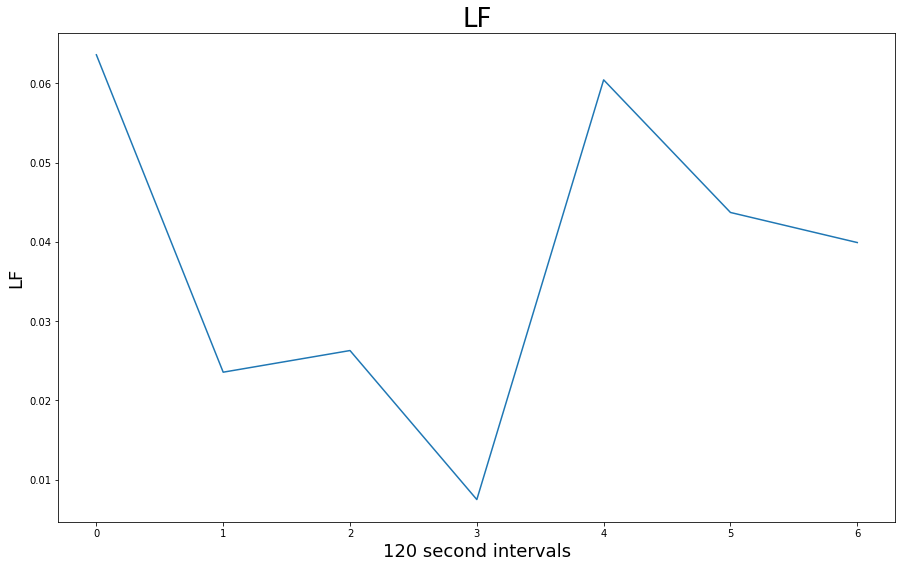

In [ ]:
plt.ylabel("LF", fontsize=18)
plt.xlabel(str(sec)+" second intervals", fontsize=18)
plt.plot(LF, color="#1f77b4")
plt.title("LF",fontsize=26)

In [ ]:
sec = 240
window_size = int(fs*sec)
LF, ecg_w = [], [[]]
w = 0
for p in ecg_clean:
  if w == window_size:
    ecg_w.append([p])
    w = 0
  else:
    ecg_w[-1].append(p)
  w += 1
for w in ecg_w:
  peaks, info = nk.ecg_peaks(w, sampling_rate=fs, correct_artifacts=True)
  hrv_freq = nk.hrv_frequency(peaks, sampling_rate=fs, show=False)
  LF.append(hrv_freq["HRV_LF"])

Text(0.5, 1.0, 'LF')

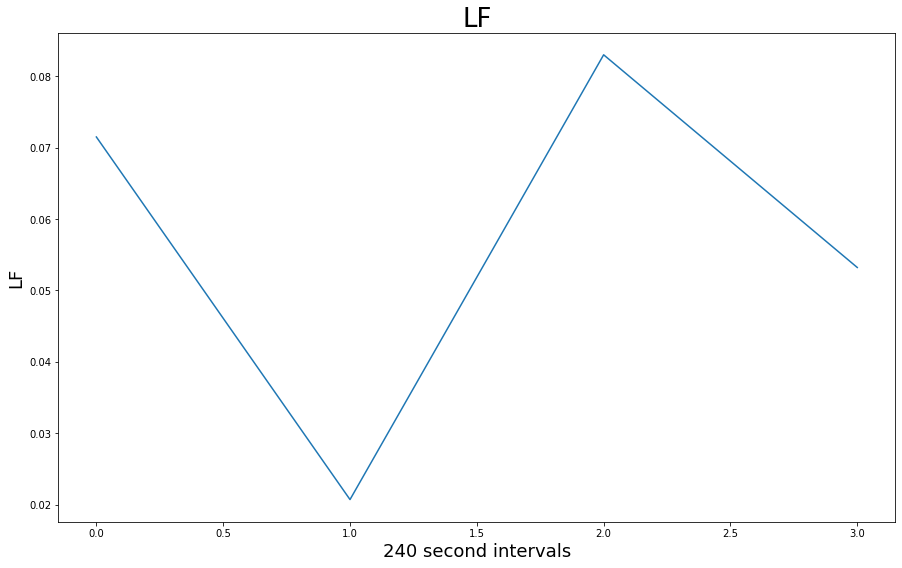

In [ ]:
plt.ylabel("LF", fontsize=18)
plt.xlabel(str(sec)+" second intervals", fontsize=18)
plt.plot(LF, color="#1f77b4")
plt.title("LF",fontsize=26)